In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('../data/RD.csv')

In [4]:
#df.head()

In [5]:
#convert timeStamp from object to actual time stamp
df['opening_date'] = pd.to_datetime(df['opening_date'])

In [6]:
type(df['opening_date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df['Oyear'] = df['opening_date'].apply(lambda time: time.year)
df['OMonth'] = df['opening_date'].apply(lambda time: time.month)
df['ODay'] = df['opening_date'].apply(lambda time: time.day)

In [8]:
#convert timeStamp from object to actual time stamp
df['c_date'] = pd.to_datetime(df['c_date'])

In [9]:
type(df['c_date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df['Myear'] = df['c_date'].apply(lambda time: time.year)

In [11]:
df.head()

,Unnamed: 0,Region,gender,peroid,roi,amt,RD_loan,opening_date,c_date,Oyear,OMonth,ODay,Myear
0,0,Maharashtra,M,9,7.5,34343,0,2017-07-07,2026-07-07,2017,7,7,2026
1,1,Gujarat,F,7,7.5,8979,0,2016-08-28,2023-08-28,2016,8,28,2023
2,2,Gujarat,M,5,7.5,11250,1,2015-03-27,2020-03-27,2015,3,27,2020
3,3,Gujarat,F,5,7.5,79242,1,2016-06-14,2021-06-14,2016,6,14,2021
4,4,Gujarat,M,8,7.5,54700,1,2010-06-30,2018-06-30,2010,6,30,2018


In [12]:
df['Region'].value_counts()

Maharashtra    39
Gujarat        34
MP             10
Delhi          10
Karnataka       7
Name: Region, dtype: int64

In [13]:
tmp=df['Region'].value_counts().to_dict()

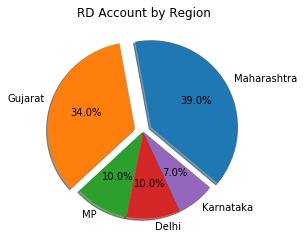

In [14]:
plt.title('RD Account by Region')
plt.pie(x=list(tmp.values()),labels=list(tmp.keys()),data=df,shadow=True,startangle=-40,autopct='%1.1f%%',explode=(0.1,0.1,0,0,0))
plt.Circle((0,0),0.80,color='black', fc='white',linewidth=1.25)

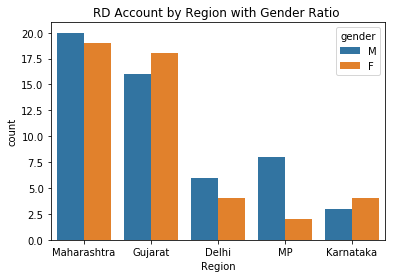

In [15]:
plt.title('RD Account by Region with Gender Ratio ')
sns.countplot(x='Region',hue='gender',data=df)

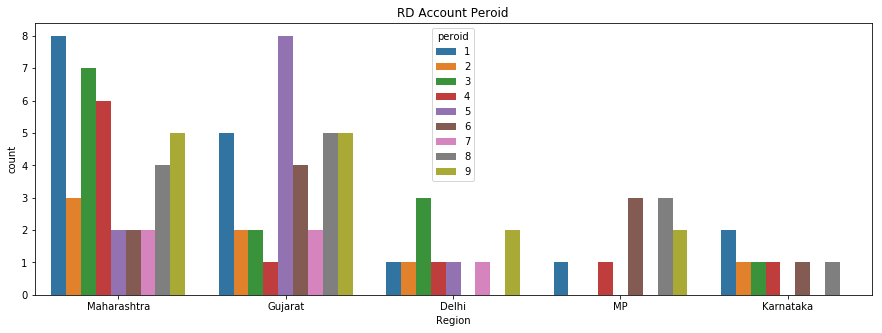

In [16]:
plt.figure(figsize=(15,5))
plt.title('RD Account Peroid')
sns.countplot(x='Region',hue='peroid',data=df)

In [17]:
x=df['gender'].value_counts().to_dict()

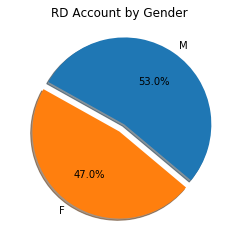

In [18]:
plt.title('RD Account by Gender')
plt.pie(x=list(x.values()),labels=list(x.keys()),data=df,shadow=True,startangle=-40,autopct='%1.1f%%',explode=(0.1,0))
plt.Circle((0,0),0.80,color='black', fc='white',linewidth=1.25)

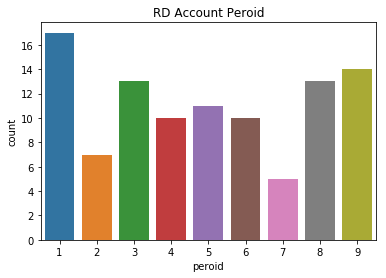

In [19]:
plt.title('RD Account Peroid')
sns.countplot(x='peroid',data=df)

In [20]:
x=df['RD_loan'].value_counts().to_dict()

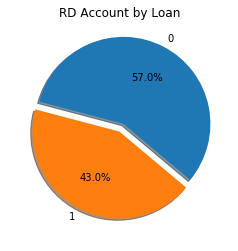

In [21]:
plt.title('RD Account by Loan')
plt.pie(x=list(x.values()),labels=list(x.keys()),data=df,shadow=True,startangle=-40,autopct='%1.1f%%',explode=(0.1,0))
plt.Circle((0,0),0.80,color='black', fc='white',linewidth=1.25)

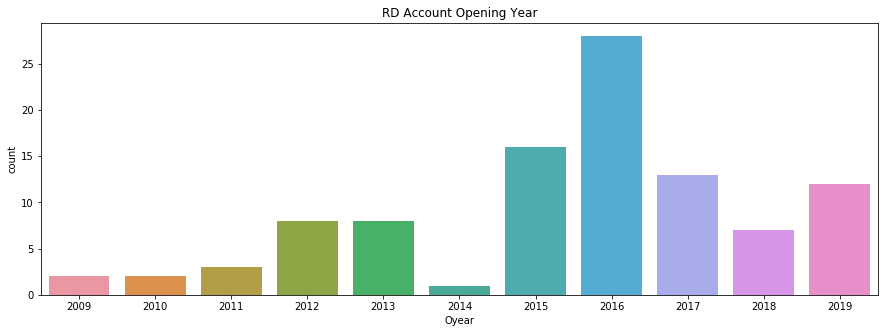

In [22]:
plt.figure(figsize=(15,5))
plt.title('RD Account Opening Year')
sns.countplot(x='Oyear',data=df)

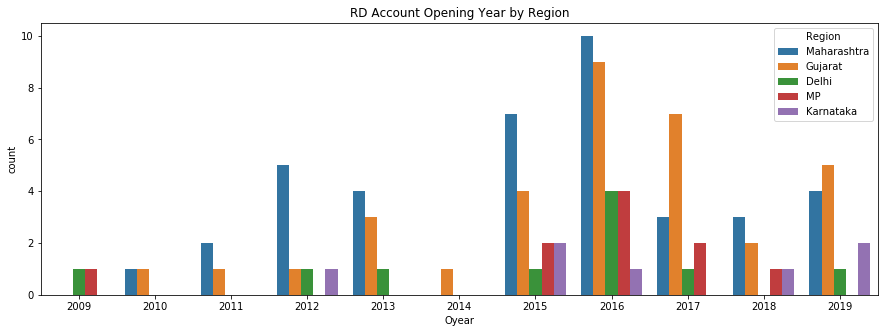

In [30]:
plt.figure(figsize=(15,5))
plt.title('RD Account Opening Year by Region')
sns.countplot(x='Oyear',hue='Region',data=df)

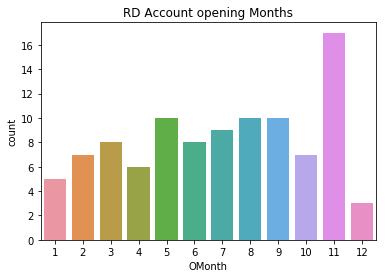

In [24]:
plt.title('RD Account opening Months')
sns.countplot(x='OMonth',data=df)

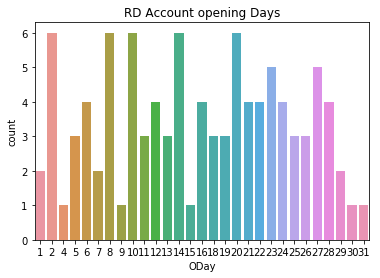

In [25]:
plt.title('RD Account opening Days')
sns.countplot(x='ODay',data=df)

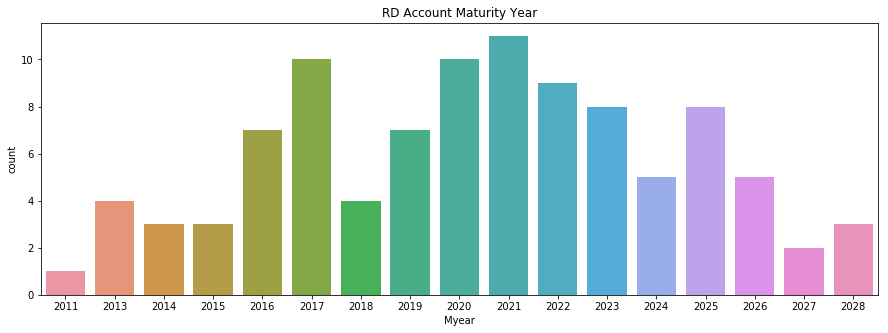

In [26]:
plt.figure(figsize=(15,5))
plt.title('RD Account Maturity Year')
sns.countplot(x='Myear',data=df)

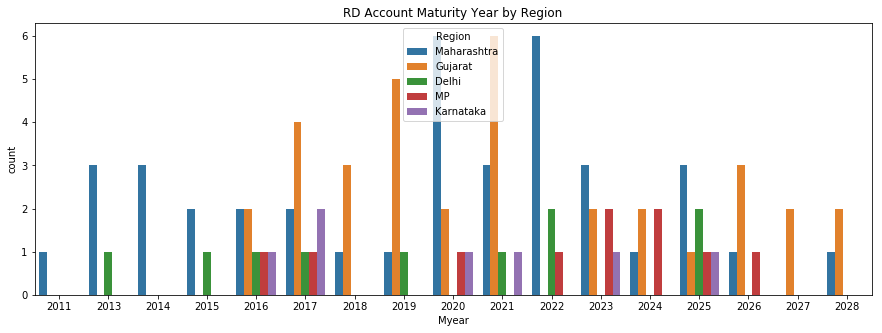

In [31]:
plt.figure(figsize=(15,5))
plt.title('RD Account Maturity Year by Region')
sns.countplot(x='Myear',hue='Region',data=df)

In [28]:
x=df.groupby('Region').mean()
x

,Unnamed: 0,peroid,roi,amt,RD_loan,Oyear,OMonth,ODay,Myear
Region,,,,,,,,,
Delhi,35.900000,4.600000,7.5,38418.600000,0.400000,2014.900000,8.900000,16.300000,2019.500000
Gujarat,54.970588,5.352941,7.5,41661.264706,0.500000,2015.882353,6.764706,16.911765,2021.235294
Karnataka,71.714286,3.571429,7.5,28980.857143,0.285714,2016.285714,8.142857,20.571429,2019.857143
MP,50.000000,6.500000,7.5,41348.700000,0.300000,2015.500000,7.300000,14.800000,2022.000000
Maharashtra,44.102564,4.410256,7.5,34111.974359,0.435897,2015.128205,6.205128,14.717949,2019.538462


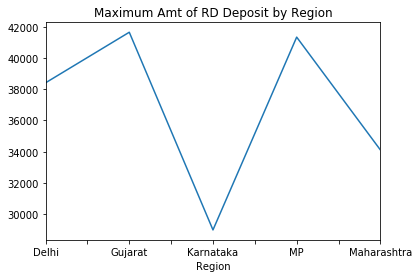

In [29]:
plt.title('Maximum Amt of RD Deposit by Region')
x['amt'].plot()